# Atividade 1

Atividade 1 realizada para a materia de Redes neurais ministrada pelo Prof. Dr. Lucas Correia Ribas.

Este notebook inclui a implementação pedida de um perceptron, funções para seu treinamento, e visualização/análise de seus resultados.

![perceptron_sketch](img/recap.png)

### Inicialização dos datasets

In [103]:
import pandas as pd

df_train_loaded = pd.read_csv("datasets/train_dataset1.csv")
df_test_loaded = pd.read_csv("datasets/test_dataset1.csv")
X_train = df_train_loaded.drop("label", axis=1).values.T # (n_features, n_amostras)
y_train = df_train_loaded["label"].values.reshape(1, -1) # (1, n_amostras)
X_test = df_test_loaded.drop("label", axis=1).values.T
y_test = df_test_loaded["label"].values.reshape(1, -1)

#print(df_train_loaded)

### Implementação do perceptron

A função sigmoide foi escolhida como a função de ativação para os outros exemplos visto que seus resultados foram consideravelmente mais estaveis. Na figuras a seguir é possível observar essa discrepância no dataset 1.  

<Figure size 600x400 with 0 Axes>

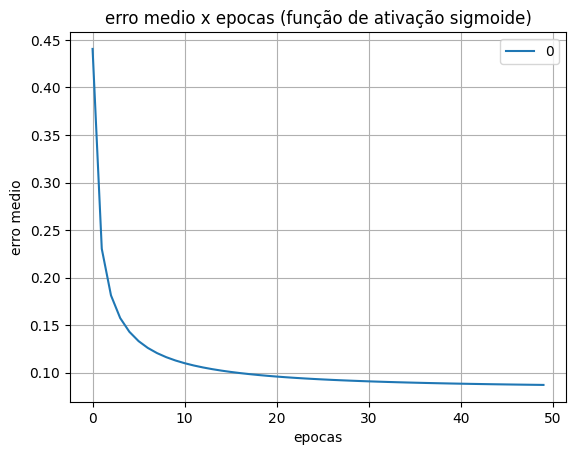

<Figure size 600x400 with 0 Axes>

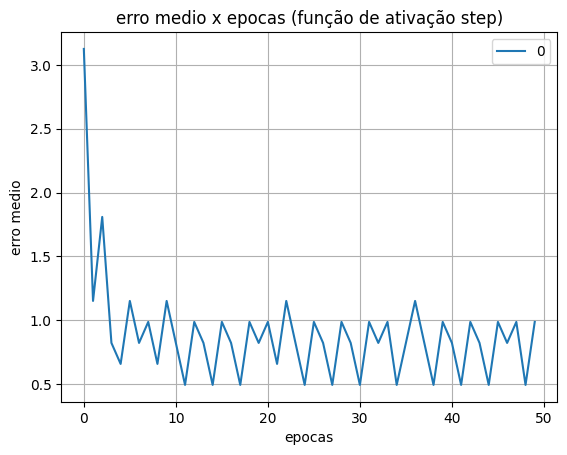

In [104]:
import pandas as pd
import numpy as np

def generate_weights(n_features, seed=None):
    rg = np.random.default_rng(seed)
    weights = rg.random((1, n_features))[0]

    return weights

def weighted_sum(features, weights, bias):
    return np.dot(features, weights) + bias 

def activate(w_sum):
    return 1 if w_sum > 0 else 0

def sigmoid_activation(w_sum):
    return 1/(1+np.exp(-w_sum))

def error(target, pred):
    # --- problem encountered here ---
    # original code:
    # return -(target*np.log10(pred) + (1-target)*np.log10(1-pred))
    # if pred is close to zero or 1, log10 starts nearing negative infinity
    # solution was to clip input between values VERY close to 0 or VERY close to 1

    pred = np.clip(pred, 1e-10, (1 - 1e-10))
    return -(target*np.log(pred) + (1-target)*np.log(1-pred))
    
def update_weights(weights, learn_rate, target, pred, features):
    new_weights = []

    for x,w in zip(features, weights):
        new_w = w + learn_rate*(target - pred)*x
        new_weights.append(new_w)

    return new_weights

def update_bias(bias, l_rate, target, pred):
    return bias + l_rate*(target - pred)

def train_network(data, weights, bias, learn_rate, epochs):

    for e in range(epochs): # passo 5
        losses = []
        predicted_values = []

        for i in range(len(data)):
            #features = data.iloc[i, :-1] 
            features = np.append(data.iloc[i, :-1].values, 1)
            target = data.iloc[i, -1] # passo 2

            w_sum = weighted_sum(features, weights, bias)
            pred = sigmoid_activation(w_sum)
            predicted_values.append(pred)
            loss = error(target, pred)
            losses.append(loss)

            if pred != target:
                weights = update_weights(weights, learn_rate, target, pred, features) # passo 6
                bias = update_bias(bias, learn_rate, target, pred)

        avg_loss = sum(losses)/len(losses)
        epoch_loss.append(avg_loss)
        #print(f"----\n EPOCH {e+1}\n AVERAGE LOSS = {avg_loss}\n")

    return weights, predicted_values

# -- running model --
df = df_train_loaded # passo 1
df["label"] = df["label"].replace({-1: 0}) 
weights = generate_weights((df.shape[1]), 42) # passo 3

#print(df)
#print("\n\n", weights)

bias = -1
learn_rate = 0.1 # passo 4
epochs = 50

epoch_loss = []
new_weights, predicted_values = train_network(df, weights, bias, learn_rate, epochs)

# -- plots --
plt.figure(figsize=(6, 4))
pd.DataFrame(epoch_loss).plot(kind="line", grid=True)
plt.title("erro medio x epocas (função de ativação sigmoide)")
plt.xlabel("epocas")
plt.ylabel("erro medio")
plt.show()

# --- treinamento utilizando funcao step ---
def train_network_step(data, weights, bias, learn_rate, epochs):

    for e in range(epochs): # passo 5
        losses = []
        predicted_values = []

        for i in range(len(data)):
            #features = data.iloc[i, :-1] 
            features = np.append(data.iloc[i, :-1].values, 1)
            target = data.iloc[i, -1] # passo 2

            w_sum = weighted_sum(features, weights, bias)
            pred = activate(w_sum)
            predicted_values.append(pred)
            loss = error(target, pred)
            losses.append(loss)

            if pred != target:
                weights = update_weights(weights, learn_rate, target, pred, features) # passo 6
                bias = update_bias(bias, learn_rate, target, pred)

        avg_loss = sum(losses)/len(losses)
        epoch_loss.append(avg_loss)
        #print(f"----\n EPOCH {e+1}\n AVERAGE LOSS = {avg_loss}\n")

    return weights, predicted_values

df = df_train_loaded # passo 1
df["label"] = df["label"].replace({-1: 0}) 
weights = generate_weights((df.shape[1]), 42) # passo 3

#print(df)
#print("\n\n", weights)

bias = -1
learn_rate = 0.1 # passo 4
epochs = 50

epoch_loss = []
new_weights2, predicted_values2 = train_network_step(df, weights, bias, learn_rate, epochs)

# -- plots --
plt.figure(figsize=(6, 4))
pd.DataFrame(epoch_loss).plot(kind="line", grid=True)
plt.title("erro medio x epocas (função de ativação step)")
plt.xlabel("epocas")
plt.ylabel("erro medio")
plt.show()


### Função de teste do perceptron

Implementação de uma função para realizar apenas a classificação de datasets utilizando os pesos já calculados na fase de treinamento para testart o modelo.
Também foram implementados funções para calcular a acúracia e plotar gráficos demonstrando como a linha de decisão resultante do treinamento dos modelos passa pelos dados de cada dataset. 

In [102]:
import numpy as np
import matplotlib.pyplot as plt


#function that uses the calculatd new_weights from the trainingh phase to classify a dataset 
def only_classify(data, weights, bias, learn_rate, epochs):

    predicted_values = []
    for i in range(len(data)):
        features = np.append(data.iloc[i, :-1].values, 1)
        target = data.iloc[i, -1] # passo 2
        w_sum = weighted_sum(features, weights, bias)
        pred = sigmoid_activation(w_sum)
        predicted_values.append(pred)
    #epoch_loss.append(avg_loss)
    #print(f"----\n EPOCH {e+1}\n AVERAGE LOSS = {avg_loss}\n")

    return predicted_values

def calculate_accuracy(predicted_values, target):
    if len(predicted_values) != len(target):
        raise ValueError("pred and target have different lengthsf")
        
    # converting decimal predicted value into binary values (like target) 
    predicted_binary = [1 if p >= 0.5 else 0 for p in predicted_values]
    
    hits = sum(p == t for p, t in zip(predicted_binary, target))
    accuracy = hits / len(target)
    
    return accuracy

def plot_decision_boundary(data, weights, bias, title):
	x1 = data.iloc[:, 0]
	x2 = data.iloc[:, 1]
	y = data.iloc[:, -1]

	plt.scatter(x1[y == 0], x2[y == 0], color='blue', label='y=0')
	plt.scatter(x1[y == 1], x2[y == 1], color='red', label='y=1')

	x1_vals = np.linspace(min(x1) - 0.5, max(x1) + 0.5, 100)
	x2_vals = -(weights[0] * x1_vals + bias) / weights[1]

	plt.plot(x1_vals, x2_vals, 'k--', label="fronteira de decisao")

	plt.xlabel("x1")
	plt.ylabel("x2")
	plt.title(title)
	plt.legend()
	plt.show()


## Dataset 1

acuracia dataset TESTE:  0.95
taxa de aprendizado = 0.1
epocas = 100



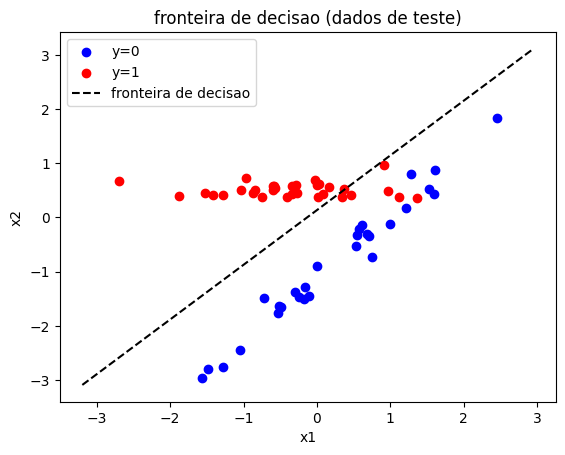



acuracia dataset TREINAMENTO:  0.9785714285714285
taxa de aprendizado = 0.1
epocas = 100



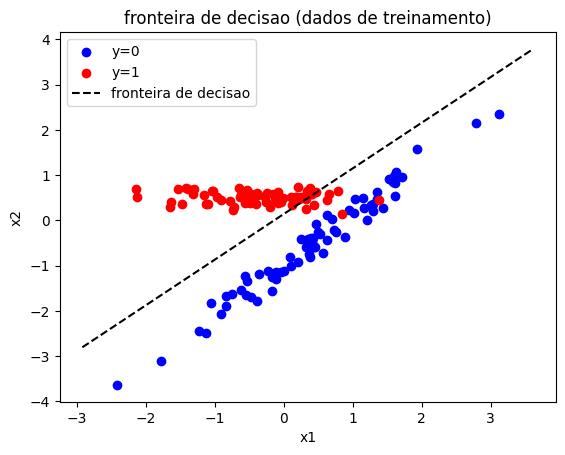

<Figure size 600x400 with 0 Axes>

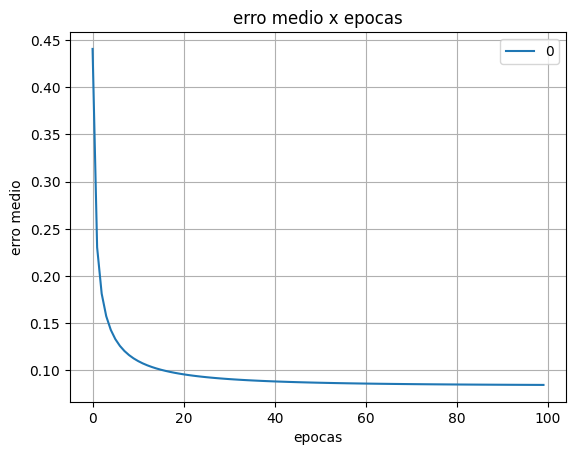

In [101]:
# teste usando dataset 1
df_train_loaded = pd.read_csv("datasets/train_dataset1.csv")
df_test_loaded = pd.read_csv("datasets/test_dataset1.csv")

# treinamento e coleta de pesos 
bias = -1
learn_rate = 0.1
epochs = 100

df_train = df_train_loaded
df_train["label"] = df_train["label"].replace({-1: 0}) 
weights = generate_weights((df_train.shape[1]), 42) # passo 3

epoch_loss = []
new_weights, train_pred = train_network(df_train, weights, bias, learn_rate, epochs)

# teste com dataset de teste 
df_test = df_test_loaded 
df_test["label"] = df_test["label"].replace({-1: 0}) 

predicted_values = only_classify(df_test, new_weights, bias, learn_rate, epochs)
print("acuracia dataset TESTE: ", calculate_accuracy(predicted_values, df_test["label"]))
print(f"taxa de aprendizado = {learn_rate}\nepocas = {epochs}\n")
plot_decision_boundary(df_test, new_weights, bias, "fronteira de decisao (dados de teste)")

# teste com dataset de treinamento 
print("\n")
predicted_values = only_classify(df_train, new_weights, bias, learn_rate, epochs)
print("acuracia dataset TREINAMENTO: ", calculate_accuracy(predicted_values, df_train["label"]))
print(f"taxa de aprendizado = {learn_rate}\nepocas = {epochs}\n")
plot_decision_boundary(df_train, new_weights, bias, "fronteira de decisao (dados de treinamento)")

# -- plot epocas x erro medio --
plt.figure(figsize=(6, 4))
pd.DataFrame(epoch_loss).plot(kind="line", grid=True)
plt.title("erro medio x epocas")
plt.xlabel("epocas")
plt.ylabel("erro medio")
plt.show()


### Resultados

O modelo conseguiu alcançar uma acurácia relativamente alta após seu treinamento, tendo uma queda de performance perceptível mas aceitável quando é aplicado ao modelo de teste. O erro médio durante as épocas entra em um plateau em torno da época 60, mostrando uma boa generalização dos dados treinados.  


## Dataset 2

acuracia dataset TESTE:  0.29333333333333333
taxa de aprendizado = 0.1
epocas = 500



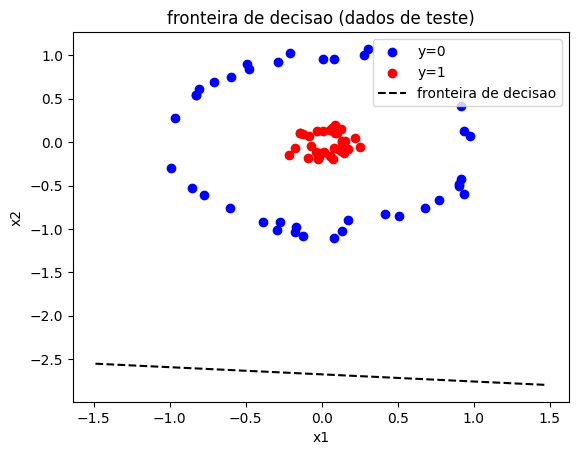


acuracia dataset TREINAMENTO:  0.37142857142857144
taxa de aprendizado = 0.1
epocas = 500



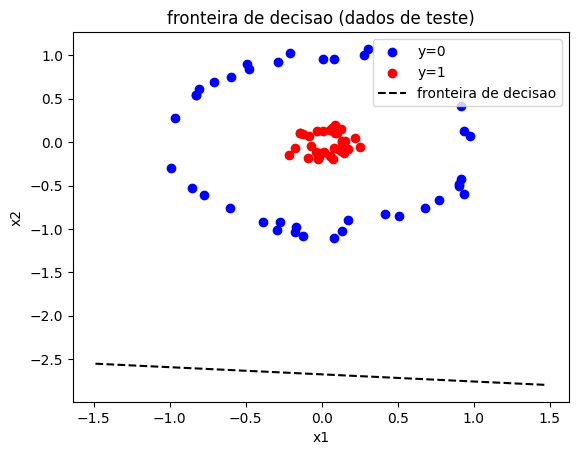

<Figure size 600x400 with 0 Axes>

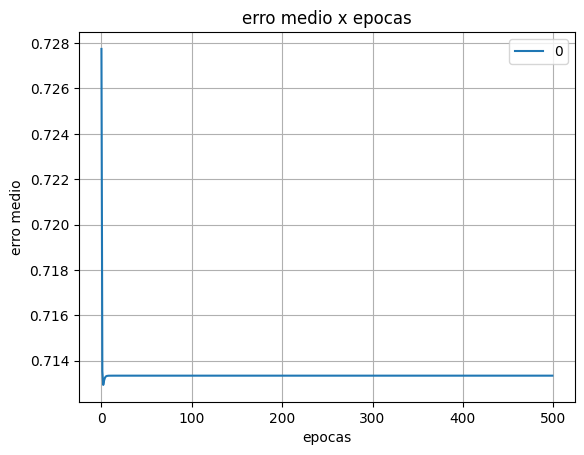

In [106]:
import pandas as pd 

df_train_loaded = pd.read_csv("datasets/train_dataset2.csv")
df_test_loaded = pd.read_csv("datasets/test_dataset2.csv")

# treinamento e coleta de pesos 
bias = -1
learn_rate = 0.1
epochs = 100

df_train = df_train_loaded
df_train["label"] = df_train["label"].replace({-1: 0}) 
weights = generate_weights((df_train.shape[1]), 42) # passo 3

epoch_loss = []
new_weights, train_pred = train_network(df_train, weights, bias, learn_rate, epochs)

# teste com dataset de teste 
df_test = df_test_loaded 
df_test["label"] = df_test["label"].replace({-1: 0}) 

predicted_values = only_classify(df_test, new_weights, bias, learn_rate, epochs)
print("acuracia dataset TESTE: ", calculate_accuracy(predicted_values, df_test["label"]))
print(f"taxa de aprendizado = {learn_rate}\nepocas = {epochs}\n")
plot_decision_boundary(df_test, new_weights, bias, "fronteira de decisao (dados de teste)")

# teste com dataset de treinamento 
predicted_values = only_classify(df_train, new_weights, bias, learn_rate, epochs)
print("\nacuracia dataset TREINAMENTO: ", calculate_accuracy(predicted_values, df_train["label"]))
print(f"taxa de aprendizado = {learn_rate}\nepocas = {epochs}\n")
plot_decision_boundary(df_test, new_weights, bias, "fronteira de decisao (dados de teste)")

# --- erro medio x epocas ---
plt.figure(figsize=(6, 4))
pd.DataFrame(epoch_loss).plot(kind="line", grid=True)
plt.title("erro medio x epocas")
plt.xlabel("epocas")
plt.ylabel("erro medio")
plt.show()



### Resultados

O dados do dataset 2 são característicos de um conjunto de dados não linearmente separável, e subsequentemente o modelo composto de um único perceptron não é capaz de realizar uma classificação correta dos dados. Isto é aparente quando se observa o gráfico de Erro médio por Épocas, onde a taxa de erro imediatamente encontra um alto plateau pelo fato do modelo não conseguir encontrar pesos que separem as classes do dataset. O modelo subsequentemente traça uma fronteira de decisão completamente errônea.   


## Dataset 2 (com taxa de treinamento mais ecêntrica)

acuracia dataset TESTE:  0.6933333333333334
taxa de aprendizado = 1
epocas = 100



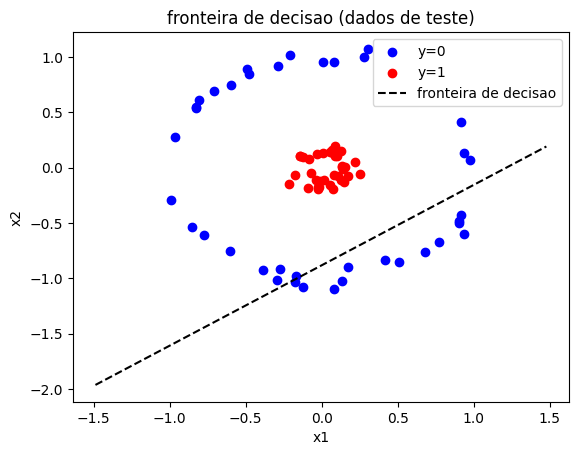


acuracia dataset TREINAMENTO:  0.7028571428571428
taxa de aprendizado = 1
epocas = 100



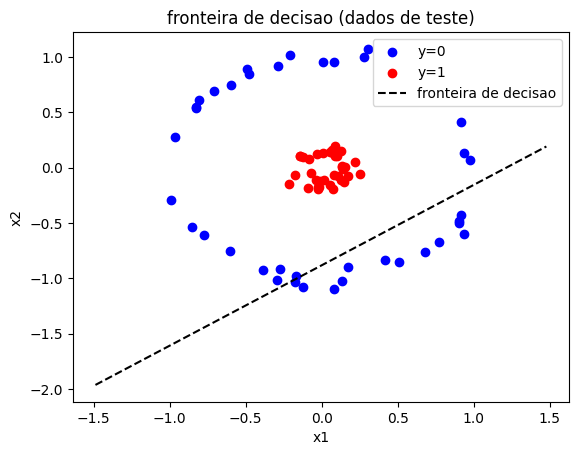

<Figure size 600x400 with 0 Axes>

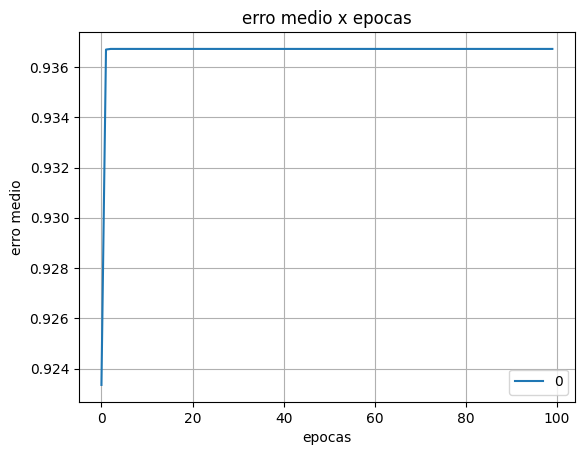

In [109]:
#teste com um maior numero de epocas e uma taxa de treinamento maior
import pandas as pd 

df_train_loaded = pd.read_csv("datasets/train_dataset2.csv")
df_test_loaded = pd.read_csv("datasets/test_dataset2.csv")

# treinamento e coleta de pesos 
bias = -1
learn_rate = 1
epochs = 100

df_train = df_train_loaded
df_train["label"] = df_train["label"].replace({-1: 0}) 
weights = generate_weights((df_train.shape[1]), 42) # passo 3

epoch_loss = []
new_weights, train_pred = train_network(df_train, weights, bias, learn_rate, epochs)

# teste com dataset de teste 
df_test = df_test_loaded 
df_test["label"] = df_test["label"].replace({-1: 0}) 

predicted_values = only_classify(df_test, new_weights, bias, learn_rate, epochs)
print("acuracia dataset TESTE: ", calculate_accuracy(predicted_values, df_test["label"]))
print(f"taxa de aprendizado = {learn_rate}\nepocas = {epochs}\n")
plot_decision_boundary(df_test, new_weights, bias, "fronteira de decisao (dados de teste)")

# teste com dataset de treinamento 
predicted_values = only_classify(df_train, new_weights, bias, learn_rate, epochs)
print("\nacuracia dataset TREINAMENTO: ", calculate_accuracy(predicted_values, df_train["label"]))
print(f"taxa de aprendizado = {learn_rate}\nepocas = {epochs}\n")
plot_decision_boundary(df_test, new_weights, bias, "fronteira de decisao (dados de teste)")

# --- erro medio x epocas ---
plt.figure(figsize=(6, 4))
pd.DataFrame(epoch_loss).plot(kind="line", grid=True)
plt.title("erro medio x epocas")
plt.xlabel("epocas")
plt.ylabel("erro medio")
plt.show()


### Resultados
Curiosamente, incrementar a taxa de treinamento por 10 vezes causa com que a acurácia do modelo aumente significativamente. O modelo aparenta entrar em um estado de overfit, buscando englobar a maior quantidade de dados da classe 0 antes da fronteira de decisão cruzar o grupo de dados da classe 1, ignorando os subsequente dados da classe 0 além deste grupo. Este exemplo é demonstra que a acurácia por si só nem sempre é uma métrica confiável na avaliação de um modelo.   

## Dataset 3

taxa de treinamento = 0.1
epocas = 100

acuracia (dataset TESTE): 0.873015873015873

acuracia (dataset TREINAMENTO):: 0.9183673469387755


<Figure size 600x400 with 0 Axes>

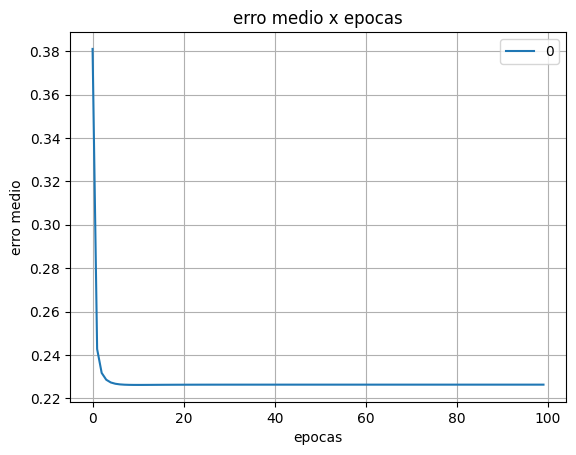


----------------------------------------------------------------

taxa de treinamento = 0.1
epocas = 200

acuracia (dataset TESTE): 0.873015873015873

acuracia (dataset TREINAMENTO):: 0.9183673469387755


<Figure size 600x400 with 0 Axes>

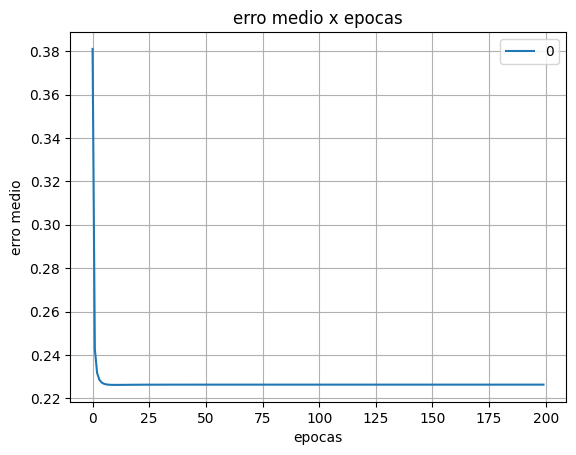


----------------------------------------------------------------

taxa de treinamento = 0.001
epocas = 100

acuracia (dataset TESTE): 0.873015873015873

acuracia (dataset TREINAMENTO):: 0.9251700680272109


<Figure size 600x400 with 0 Axes>

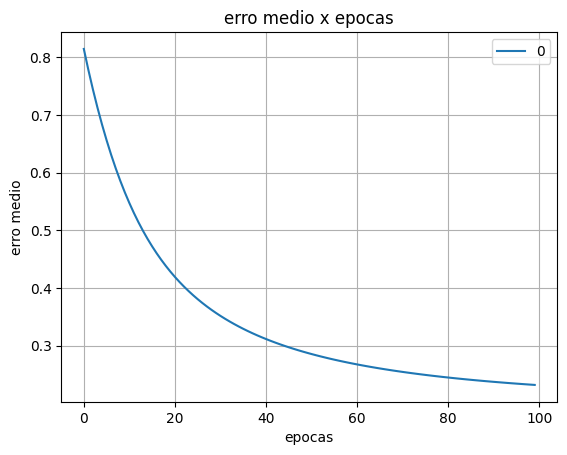


----------------------------------------------------------------

taxa de treinamento = 0.001
epocas = 200

acuracia (dataset TESTE): 0.873015873015873

acuracia (dataset TREINAMENTO):: 0.9319727891156463


<Figure size 600x400 with 0 Axes>

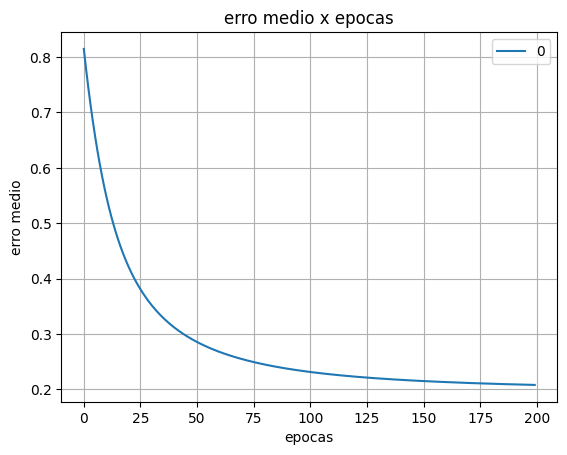


----------------------------------------------------------------

taxa de treinamento = 0.0001
epocas = 100

acuracia (dataset TESTE): 0.6507936507936508

acuracia (dataset TREINAMENTO):: 0.7142857142857143


<Figure size 600x400 with 0 Axes>

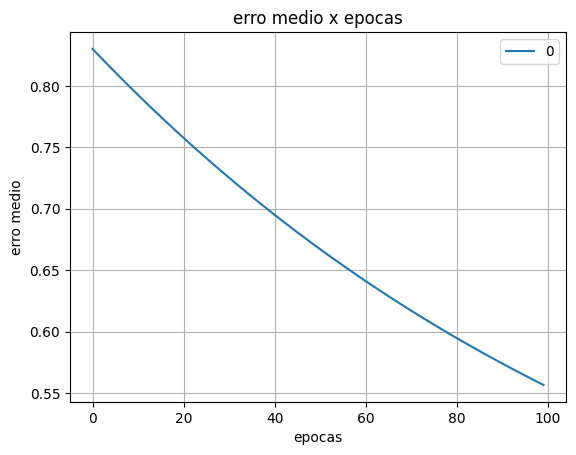


----------------------------------------------------------------

taxa de treinamento = 0.0001
epocas = 200

acuracia (dataset TESTE): 0.7301587301587301

acuracia (dataset TREINAMENTO):: 0.8027210884353742


<Figure size 600x400 with 0 Axes>

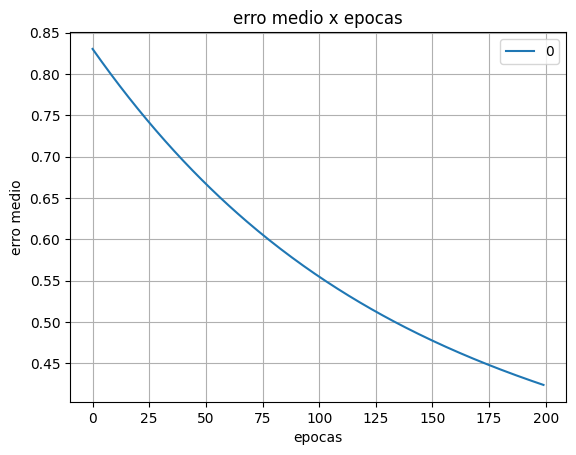


----------------------------------------------------------------



In [114]:
import pandas as pd

learn_rates = [0.1, 0.001, 0.0001]
epochs_list = [100, 200]

df_train_loaded = pd.read_csv("datasets/train_dataset3.csv")
df_test_loaded = pd.read_csv("datasets/test_dataset3.csv")

for learn_rate in learn_rates:
    for epochs in epochs_list:
        print(f"taxa de treinamento = {learn_rate}\nepocas = {epochs}\n")
        
        bias = -1
        df_train = df_train_loaded.copy()
        df_train["label"] = df_train["label"].replace({-1: 0}) 
        weights = generate_weights((df_train.shape[1]), 42)
        epoch_loss = []
        new_weights, train_pred = train_network(df_train, weights, bias, learn_rate, epochs)
        
        # teste com dataset de treinamento 
        df_test = df_test_loaded.copy()
        df_test["label"] = df_test["label"].replace({-1: 0}) 
        predicted_values = only_classify(df_test, new_weights, bias, learn_rate, epochs)
        accuracy_test = calculate_accuracy(predicted_values, df_test["label"])
        print("acuracia (dataset TESTE):", accuracy_test)
        #plot_decision_boundary(df_test, new_weights, bias, "fronteira de decisao (dados de teste)")
        
        # teste com dataset de treinamento 
        predicted_values = only_classify(df_train, new_weights, bias, learn_rate, epochs)
        accuracy_train = calculate_accuracy(predicted_values, df_train["label"])
        print("\nacuracia (dataset TREINAMENTO)::", accuracy_train)
        #plot_decision_boundary(df_train, new_weights, bias, "fronteira de decisao (dados de treinamento)")
        
        plt.figure(figsize=(6, 4))
        pd.DataFrame(epoch_loss).plot(kind="line", grid=True)
        plt.title("erro medio x epocas")
        plt.xlabel("epocas")
        plt.ylabel("erro medio")
        plt.show()

        print("\n----------------------------------------------------------------\n")

### Resultados 

O dataset 3 possui uma alta dimensionalidade. Tais features subsequentemente aparentam viabilizar uma boa classificação dos dados pelo modelo. A taxa de aprendizado aprenta ditar o quao imediato a chegada a um plateau de treinamento é alcançando. O número de épocas não aparenta modificar os resultados substancialmente. Curiosamente, a taxa de erro não parece estar substancialmente correlacionada com a acurácia do modelo.